
<h1><center><strong>Predict the categories of the NEWS Article</strong></center></h1>


---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)<br>
  - **3.2** [**Importing Libraries**](#Section32)<br>

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Information**](#Section41)
  - **4.2** [**Data Statistics**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
**6.** [**Model Development & Evaluation**](#Section6)<br>



---
<a name = Section1></a>
# **1. Introduction**
---

The News Agency trying to cope up with the changing world.

- They want to maintain a central database of all the news.
- And, extra emphasis on categorizing the news into different sections.
- The idea is to create a mobile app for reading news.
- They are planning on creating a user-friendly app that shows only what the user wants to see.

---
<a name = Section2></a>
# **2. Problem Statement**
---

The current practice suffers from the following problems:

- This approach is too haphazard.
- Nowadays not many people listen to the news on the radio and TV or read any newspaper.
With evolving technologies, people prefer using phones over other gadgets.
- Reading out news seems to take a lot of manual effort which the company wants to cut down.

The Admin Department has hired you as an AI Engineer. They want to supplement their security protocols with a more proactive approach.

**<h4>Consulting Goal :</h4>**

**Your Role**

- You will be provided with a dataset consisting of different news categories, headlines of the news, a short description of the news, date of the news, and links to the news.
- You have to build a model using the provided data from the database.
- The model should be able to classify the category of the news article given a text sequence.
- his model will then be used to distribute news articles to people with specific subscriptions.


**Problem Specifics**

- Deliverables:Predict whether the news article belongs to one of the many categories as subscribed by the customers.
- Deep Learning task: Build a Text Classification model to classify the texts
- Target: Predict the categories of the news article.
- Win Condition: The model should be able to classify the article based on the type of text provided.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import pickle

#Data Visualization
import matplotlib.pyplot as plt

#Text Color
from termcolor import colored

#Train Test Split
from sklearn.model_selection import train_test_split

#Model Evaluation
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

#Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model
from keras.models import load_model

nltk.download('wordnet')
nltk.download('punkt')
nltk.download("stopwords")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

<a name = Section4></a>
## **4. Data Loading and Dataset Description**


  Column    	    Description
- REF_NO	 :    Contains a unique number for each row.
- category :	  Contains 41 different categories for the news.
- Headline :	  Contains Headline of the news.
- author   :	  Contains the name of the author who wrote the news.
- link     :	  Contains a link to the news.
- date	   :    Contains the date at which the news was published.
- short_description:	Contains a brief description of the news.

<a name = Section41></a>
### **4.1 Data Loading**

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


<a name = Section42></a>
### **4.2 Data Description**

In [3]:
train=pd.read_csv('/content/drive/MyDrive/NLP/NEWS/Data/Train_data.csv')
test=pd.read_csv('/content/drive/MyDrive/NLP/NEWS/Data/Test_data.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160682 entries, 0 to 160681
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   REF_NO             160682 non-null  int64 
 1   headline           160676 non-null  object
 2   authors            160682 non-null  object
 3   link               160682 non-null  object
 4   short_description  144885 non-null  object
 5   date               160682 non-null  object
 6   category           160682 non-null  object
dtypes: int64(1), object(6)
memory usage: 8.6+ MB


In [5]:
train.head()

,REF_NO,headline,authors,link,short_description,date,category
0,123291,"Putin, Fear and Leadership","James A. Cusumano, Ph.D., ContributorOwner and...",https://www.huffingtonpost.com/entry/the-simil...,There are uncomfortable parallels between Hitl...,2014-05-08,POLITICS
1,37541,"Barack Obama Failed To Get A New Climate Law, ...",Kate Sheppard,https://www.huffingtonpost.com/entry/barack-ob...,The fate of climate rules now lies with the Su...,2017-01-11,POLITICS
2,84614,Senate GOP Leaders Want To Put Ted Cruz In A T...,Laura Barrón-López,https://www.huffingtonpost.com/entry/senate-go...,WASHINGTON -- Senate Republican leaders spent ...,2015-07-26,POLITICS
3,88293,3 Uncommon Ways to Maintain Your Real Focus,"Lisa Bennett, ContributorAuthor and Communicat...",https://www.huffingtonpost.com/entry/three-unc...,As someone who has an insatiable desire to kno...,2015-06-14,HEALTHY LIVING
4,32519,Trump Wants To Dismantle The Clean Water Rule....,Dominique Mosbergen,https://www.huffingtonpost.com/entry/clean-wat...,"The drinking water of 117 million people, many...",2017-03-07,POLITICS


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   REF_NO             40171 non-null  int64 
 1   headline           40171 non-null  object
 2   authors            40171 non-null  object
 3   link               40171 non-null  object
 4   short_description  36256 non-null  object
 5   date               40171 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.8+ MB


In [7]:
train['category'].value_counts()

,count
category,
POLITICS,26173
WELLNESS,14279
ENTERTAINMENT,12797
TRAVEL,7957
STYLE & BEAUTY,7698
PARENTING,6952
HEALTHY LIVING,5351
QUEER VOICES,5084
FOOD & DRINK,5020


In [8]:
train.duplicated().sum()

0

In [9]:
train_df=train.dropna(axis=0)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144884 entries, 0 to 160681
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   REF_NO             144884 non-null  int64 
 1   headline           144884 non-null  object
 2   authors            144884 non-null  object
 3   link               144884 non-null  object
 4   short_description  144884 non-null  object
 5   date               144884 non-null  object
 6   category           144884 non-null  object
dtypes: int64(1), object(6)
memory usage: 8.8+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   REF_NO             40171 non-null  int64 
 1   headline           40171 non-null  object
 2   authors            40171 non-null  object
 3   link               40171 non-null  object
 4   short_description  36256 non-null  object
 5   date               40171 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.8+ MB


In [12]:
test.head()

,REF_NO,headline,authors,link,short_description,date
0,146508,Lindsay Lohan Clarifies Venice Film Festival A...,Unknown,https://www.huffingtonpost.com/entry/lindsay-l...,Lohan had already expressed her support for he...,2013-08-31
1,90083,Marco Rubio and the Challenge to Hillary Clinton,"Hoyt Hilsman, ContributorAuthor, journalist an...",https://www.huffingtonpost.com/entry/marco-rub...,The conventional wisdom among Democrats is tha...,2015-05-25
2,57183,Shoutout To Woke Companies: You Could Win $100...,Sarah Ruiz-Grossman,https://www.huffingtonpost.com/entry/macarthur...,“Solving society’s most pressing problems isn’...,2016-06-02
3,11632,'Religious Freedom' Clauses Are Point Of Conte...,Lydia O'Connor,https://www.huffingtonpost.com/entry/australia...,Australians voted in favor of legalizing same-...,2017-11-16
4,196326,What It Would Really Be Like to Be Married to ...,"Jenny Isenman, Contributor\nJenny From the Blo...",https://www.huffingtonpost.com/entry/christian...,Why can't our hubby's be more like Christian G...,2012-03-16


In [13]:
test_df=test.dropna(axis=0)

In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36256 entries, 0 to 40170
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   REF_NO             36256 non-null  int64 
 1   headline           36256 non-null  object
 2   authors            36256 non-null  object
 3   link               36256 non-null  object
 4   short_description  36256 non-null  object
 5   date               36256 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.9+ MB


In [15]:
train_df['content']=train_df['headline']+' '+train_df['short_description']

<ipython-input-15-a7fc49a36205>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['content']=train_df['headline']+' '+train_df['short_description']


In [16]:
test_df['content']=test_df['headline']+' '+test_df['short_description']

<ipython-input-16-195d3d2a31b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['content']=test_df['headline']+' '+test_df['short_description']


In [17]:
train_df.head()

,REF_NO,headline,authors,link,short_description,date,category,content
0,123291,"Putin, Fear and Leadership","James A. Cusumano, Ph.D., ContributorOwner and...",https://www.huffingtonpost.com/entry/the-simil...,There are uncomfortable parallels between Hitl...,2014-05-08,POLITICS,"Putin, Fear and Leadership There are uncomfort..."
1,37541,"Barack Obama Failed To Get A New Climate Law, ...",Kate Sheppard,https://www.huffingtonpost.com/entry/barack-ob...,The fate of climate rules now lies with the Su...,2017-01-11,POLITICS,"Barack Obama Failed To Get A New Climate Law, ..."
2,84614,Senate GOP Leaders Want To Put Ted Cruz In A T...,Laura Barrón-López,https://www.huffingtonpost.com/entry/senate-go...,WASHINGTON -- Senate Republican leaders spent ...,2015-07-26,POLITICS,Senate GOP Leaders Want To Put Ted Cruz In A T...
3,88293,3 Uncommon Ways to Maintain Your Real Focus,"Lisa Bennett, ContributorAuthor and Communicat...",https://www.huffingtonpost.com/entry/three-unc...,As someone who has an insatiable desire to kno...,2015-06-14,HEALTHY LIVING,3 Uncommon Ways to Maintain Your Real Focus As...
4,32519,Trump Wants To Dismantle The Clean Water Rule....,Dominique Mosbergen,https://www.huffingtonpost.com/entry/clean-wat...,"The drinking water of 117 million people, many...",2017-03-07,POLITICS,Trump Wants To Dismantle The Clean Water Rule....


In [18]:
test_df.head()

,REF_NO,headline,authors,link,short_description,date,content
0,146508,Lindsay Lohan Clarifies Venice Film Festival A...,Unknown,https://www.huffingtonpost.com/entry/lindsay-l...,Lohan had already expressed her support for he...,2013-08-31,Lindsay Lohan Clarifies Venice Film Festival A...
1,90083,Marco Rubio and the Challenge to Hillary Clinton,"Hoyt Hilsman, ContributorAuthor, journalist an...",https://www.huffingtonpost.com/entry/marco-rub...,The conventional wisdom among Democrats is tha...,2015-05-25,Marco Rubio and the Challenge to Hillary Clint...
2,57183,Shoutout To Woke Companies: You Could Win $100...,Sarah Ruiz-Grossman,https://www.huffingtonpost.com/entry/macarthur...,“Solving society’s most pressing problems isn’...,2016-06-02,Shoutout To Woke Companies: You Could Win $100...
3,11632,'Religious Freedom' Clauses Are Point Of Conte...,Lydia O'Connor,https://www.huffingtonpost.com/entry/australia...,Australians voted in favor of legalizing same-...,2017-11-16,'Religious Freedom' Clauses Are Point Of Conte...
4,196326,What It Would Really Be Like to Be Married to ...,"Jenny Isenman, Contributor\nJenny From the Blo...",https://www.huffingtonpost.com/entry/christian...,Why can't our hubby's be more like Christian G...,2012-03-16,What It Would Really Be Like to Be Married to ...


<a name = Section5></a>
## **5. Data Pre-Processing**

- preprocessing the news data

In [19]:
def text_preprocess(text):
  lemmatizer = WordNetLemmatizer()
  filter_Sentence = ''
  text=str(text)
  sentence = text.lower()
  sentence = re.sub(r'[^\w\s]',' ',sentence)
  sentence = re.sub(r"\d", " ", sentence)#removing digits
  sentence = re.sub(r"\s+[a-zA-Z]\s+", " ", sentence)#removing single characters
  sentence = re.sub(r"\s+", " ", sentence, flags=re.I)  # removing extra space
  sentence = re.sub(r"[,@\'?\.$%_]", "", sentence, flags=re.I)#removing multiple characters

  words = nltk.word_tokenize(sentence)
  stop_words = stopwords.words("english")
  words = [w for w in words if not w in stop_words]

  # words = [w for w in words if not w in stop_words]

  for word in words:
      #filter_Sentence = filter_Sentence + ' ' + str(word)
      filter_Sentence = filter_Sentence + ' ' + str(lemmatizer.lemmatize(word))

  return filter_Sentence

In [20]:
train_df['content']=train_df['content'].apply(text_preprocess)

<ipython-input-20-251cbf9b7d38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['content']=train_df['content'].apply(text_preprocess)


In [21]:
# # mapping
def map_category(category):
    category_map = {
        'POLITICS' : 0,
        'WELLNESS' : 1,
        'ENTERTAINMENT' : 2,
        'TRAVEL' : 3,
        'STYLE & BEAUTY' : 4,
        'PARENTING' : 5,
        'HEALTHY LIVING' : 6,
        'QUEER VOICES' : 7,
        'FOOD & DRINK' : 8,
        'BUSINESS' : 9,
        'COMEDY' : 10,
        'SPORTS' : 11,
        'BLACK VOICES' : 12,
        'HOME & LIVING' : 13,
        'PARENTS' : 14,
        'THE WORLDPOST' : 15,
        'WEDDINGS' : 16,
        'IMPACT' : 17,
        'WOMEN' : 18,
        'CRIME' : 19,
        'DIVORCE' : 20,
        'MEDIA' : 21,
        'WEIRD NEWS' : 22,
        'GREEN' : 23,
        'WORLDPOST' : 24,
        'RELIGION' : 25,
        'STYLE' : 26,
        'SCIENCE' : 27,
        'WORLD NEWS' : 28,
        'TASTE' : 29,
        'TECH' : 30,
        'MONEY' : 31,
        'ARTS' : 32,
        'GOOD NEWS' : 33,
        'FIFTY' : 34,
        'ENVIRONMENT' : 35,
        'ARTS & CULTURE' : 36,
        'LATINO VOICES' : 37,
        'COLLEGE' : 38,
        'CULTURE & ARTS' : 39,
      'EDUCATION' : 40,



    }
    return category_map.get(category, -1)


In [22]:
train_df['category'] = train_df['category'].apply(map_category)

<ipython-input-22-c63db1b1b957>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['category'] = train_df['category'].apply(map_category)


In [23]:
#removing the useless column
train_df=train_df.drop(['REF_NO','headline','authors','link','date','short_description'],axis=1)

In [24]:
train_df.head()

,category,content
0,0,putin fear leadership uncomfortable parallel ...
1,0,barack obama failed get new climate law legac...
2,0,senate gop leader want put ted cruz time wash...
3,6,uncommon way maintain real focus someone insa...
4,0,trump want dismantle clean water rule stake d...


In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144884 entries, 0 to 160681
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  144884 non-null  int64 
 1   content   144884 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.3+ MB


In [26]:
train_df['content'][3]

' uncommon way maintain real focus someone insatiable desire know everything also come find three insight particularly helpful rather concrete action serve mindset perspective take available u stay centered truly matter u individual'

<a name = Section5></a>
## **6. Model Development and Evaluation**

In [27]:
X = train_df['content']
y = train_df['category']

In [28]:
print('X.shape', X.shape)
print('y.shape', y.shape)

X.shape (144884,)
y.shape (144884,)


In [29]:
maxlen = max(len(x.split()) for x in X.values)

In [30]:
maxlen

139

#train and test split

In [31]:
from sklearn.model_selection import train_test_split
# X_train , X_test , Y_train , Y_test  = train_test_split(X, y, test_size = 0.2 , stratify = Y , random_state = 42)

In [32]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(X, y, test_size = 0.2 , stratify = y , random_state = 42)

print(f"Number of sentences for training: {len(train_sentences)} \n")
print(f"Number of labels for training: {len(train_labels)}\n")
print(f"Number of sentences for validation: {len(val_sentences)} \n")
print(f"Number of labels for validation: {len(val_labels)}")

Number of sentences for training: 115907 

Number of labels for training: 115907

Number of sentences for validation: 28977 

Number of labels for validation: 28977


#Setting hyperparamters

In [33]:
# the maximum number of words to keep, based on word frequency
NUM_WORDS = 1000

# dimension of the dense embedding that will be used in the embedding layer of the model
EMBEDDING_DIM = 64

# maximum length of all sequences
MAXLEN = max(len(x.split()) for x in X.values)

# padding strategy
PADDING = 'post'

# token to replace out-of-vocabulary words during text_to_sequence() calls
OOV_TOKEN = ""

# set LSTM dimensions
lstm1_dim = 16
lstm2_dim = 32

In [34]:
def fit_tokenizer(train_sentences, num_words, oov_token):
    # instantiate the Tokenizer class
    tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)

    # fit the tokenizer to the training sentences
    tokenizer.fit_on_texts(train_sentences)

    return tokenizer

In [35]:

# fit the Tokenizer
tokenizer = fit_tokenizer(train_sentences, NUM_WORDS, OOV_TOKEN)

# get word_index
word_index = tokenizer.word_index

print(f"Number of words in the vocabulary: {len(word_index)}\n")

Number of words in the vocabulary: 61968



In [36]:
def seq_and_pad(sentences, tokenizer, padding, maxlen):
    # convert training sentences to sequences
    sequences = tokenizer.texts_to_sequences(sentences)

    # pad the sequences using the correct padding and maxlen
    padded_sequences = pad_sequences(sequences,
                                     maxlen=maxlen,
                                     padding=padding,
                                     truncating='post')

    return padded_sequences

In [37]:
train_padded_seq = seq_and_pad(train_sentences, tokenizer, PADDING, MAXLEN)
val_padded_seq = seq_and_pad(val_sentences, tokenizer, PADDING, MAXLEN)

print(f"Shape of padded training sequences: {train_padded_seq.shape}\n")
print(f"Shape of padded validation sequences: {val_padded_seq.shape}")

Shape of padded training sequences: (115907, 139)

Shape of padded validation sequences: (28977, 139)


In [54]:
print(f"Shape of tokenized labels of the training set: {train_labels.shape}\n")
print(f"Shape of tokenized labels of the validation set: {val_labels.shape}\n")
print(f"First 5 labels of the training set:\n{train_labels[:5]}\n")
print(f"First 5 labels of the validation set:\n{val_labels[:5]}\n")

Shape of tokenized labels of the training set: (115907,)

Shape of tokenized labels of the validation set: (28977,)

First 5 labels of the training set:
68470     20
154294     5
74207      0
33003     11
12897      3
Name: category, dtype: int64

First 5 labels of the validation set:
42778     29
103058    25
146183     2
139742     0
73221      2
Name: category, dtype: int64



In [39]:
val_labels.unique()

array([29, 25,  2,  0,  9,  5, 10, 28,  4, 24,  1, 11, 13,  3, 31, 40, 21,
       15,  7,  6, 33, 37, 26, 20,  8, 36, 12, 18, 34, 32, 14, 17, 16, 27,
       19, 22, 35, 30, 38, 39, 23])

In [40]:
from keras.callbacks import EarlyStopping
earlyStop=EarlyStopping(monitor="accuracy",verbose=2,mode='auto',patience=5)

In [41]:
maxlen

139

In [71]:
def model(num_words, embedding_dim, maxlen, lstm1_dim, lstm2_dim, num_categories):
    tf.random.set_seed(123)

    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
        tf.keras.layers.Dropout(0.2),
        # tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_categories, activation='softmax')
    ])

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [43]:
num_unique_categories = np.unique(y)
print(f'Number of unique categories in the training dataset: {len(num_unique_categories)}')

Number of unique categories in the training dataset: 41


In [72]:
# create the model
# tf.get_logger().setLevel('ERROR')
model = model(NUM_WORDS, EMBEDDING_DIM, MAXLEN, lstm1_dim, lstm2_dim, len(num_unique_categories))

print(f'\nModel Summary: {model.summary()}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_32 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_33 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_34 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Model Summary: None


In [ ]:
history = model.fit(train_padded_seq, train_labels, epochs=30, validation_data=(val_padded_seq, val_labels),batch_size=256)

Epoch 1/30
453/453 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.2378 - loss: 3.0207 - val_accuracy: 0.4238 - val_loss: 2.2608
Epoch 2/30
453/453 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.4291 - loss: 2.2376 - val_accuracy: 0.4597 - val_loss: 2.0901
Epoch 3/30
453/453 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.4640 - loss: 2.0810 - val_accuracy: 0.4813 - val_loss: 1.9929
Epoch 4/30
453/453 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.4824 - loss: 1.9921 - val_accuracy: 0.4899 - val_loss: 1.9515
Epoch 5/30
453/453 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.4920 - loss: 1.9426 - val_accuracy: 0.4956 - val_loss: 1.9219
Epoch 6/30
453/453 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.5012 - loss: 1.9009 - val_accuracy: 0.4992 - val_loss: 1.9029
Epoch 7/30
453/453 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.5104 - loss: 1.8662 - val_accuracy: 0.5040 - val_loss: 1.8823
Epoch 8/30
453/453 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.5170 - loss: 1.8340 - 

#Model Evaluation

In [ ]:
def evaluate_model(history):
    # Check how accracy and loss changes over the training epochs

    epoch_accuracy = history.history['accuracy']
    epoch_val_accuracy = history.history['val_accuracy']
    epoch_loss = history.history['loss']
    epoch_val_loss = history.history['val_loss']

    plt.figure(figsize=(20, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, 'b-', linewidth=2, label='Training Accuracy')
    plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, 'r-', linewidth=2, label='Validation Accuracy')
    plt.title('Training & validation accuracy over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')

    plt.subplot(1, 2, 2)
    plt.plot(range(0, len(epoch_loss)), epoch_loss, 'b-', linewidth=2, label='Training Loss')
    plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, 'r-', linewidth=2, label='Validation Loss')
    plt.title('Training & validation loss over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='best')

    plt.show()

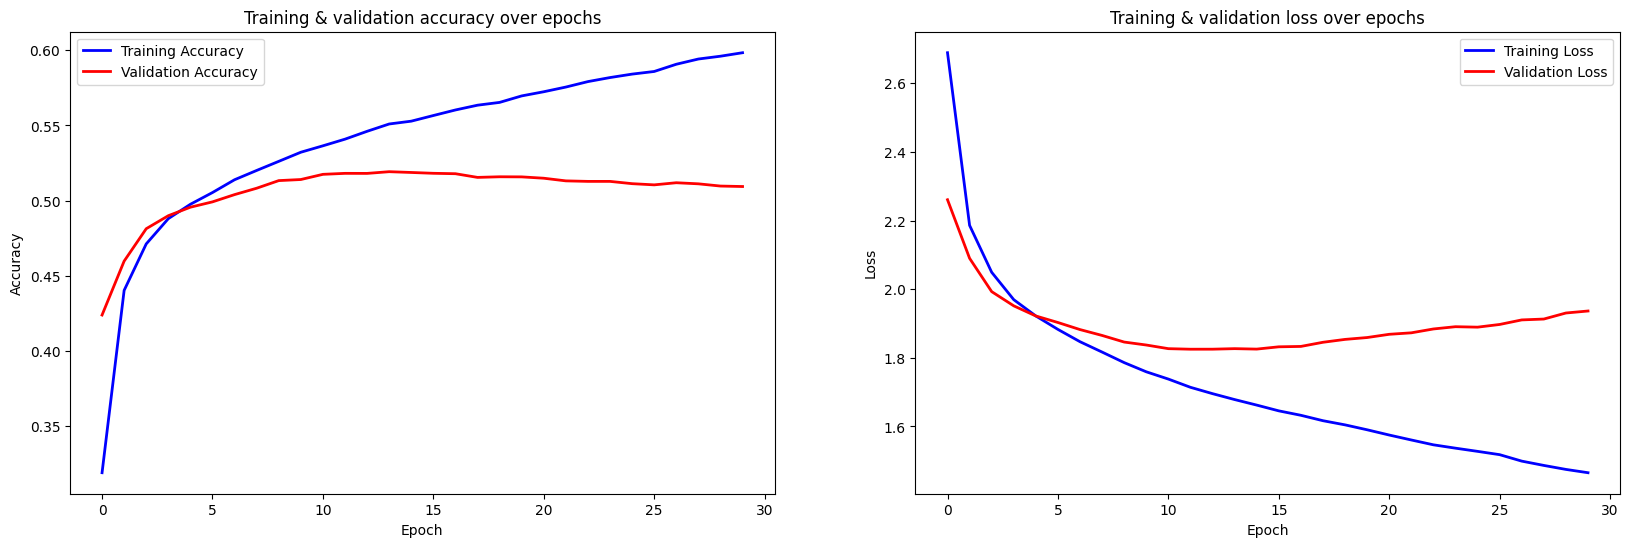

In [ ]:

# check how accuract & loss changes over epochs during the training process
evaluate_model(history)

In [ ]:
import os
# file_path = os.path.join('/content/drive/MyDrive/NLP/NEWS', 'LSTM.h5')
# model.save(file_path)

In [ ]:
# from keras.models import load_model
# model = load_model('/content/drive/MyDrive/NLP/NEWS/LSTM.h5')

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36256 entries, 0 to 40170
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   REF_NO             36256 non-null  int64 
 1   headline           36256 non-null  object
 2   authors            36256 non-null  object
 3   link               36256 non-null  object
 4   short_description  36256 non-null  object
 5   date               36256 non-null  object
 6   content            36256 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.2+ MB


In [ ]:
test_df.head()

,REF_NO,headline,authors,link,short_description,date,content
0,146508,Lindsay Lohan Clarifies Venice Film Festival A...,Unknown,https://www.huffingtonpost.com/entry/lindsay-l...,Lohan had already expressed her support for he...,2013-08-31,Lindsay Lohan Clarifies Venice Film Festival A...
1,90083,Marco Rubio and the Challenge to Hillary Clinton,"Hoyt Hilsman, ContributorAuthor, journalist an...",https://www.huffingtonpost.com/entry/marco-rub...,The conventional wisdom among Democrats is tha...,2015-05-25,Marco Rubio and the Challenge to Hillary Clint...
2,57183,Shoutout To Woke Companies: You Could Win $100...,Sarah Ruiz-Grossman,https://www.huffingtonpost.com/entry/macarthur...,“Solving society’s most pressing problems isn’...,2016-06-02,Shoutout To Woke Companies: You Could Win $100...
3,11632,'Religious Freedom' Clauses Are Point Of Conte...,Lydia O'Connor,https://www.huffingtonpost.com/entry/australia...,Australians voted in favor of legalizing same-...,2017-11-16,'Religious Freedom' Clauses Are Point Of Conte...
4,196326,What It Would Really Be Like to Be Married to ...,"Jenny Isenman, Contributor\nJenny From the Blo...",https://www.huffingtonpost.com/entry/christian...,Why can't our hubby's be more like Christian G...,2012-03-16,What It Would Really Be Like to Be Married to ...


In [ ]:
test_sentences=test_df['content']

In [ ]:
test_sentences=test_sentences.apply(text_preprocess)

In [ ]:
test_sentences.head()

,content
0,lindsay lohan clarifies venice film festival ...
1,marco rubio challenge hillary clinton convent...
2,shoutout woke company could win million chang...
3,religious freedom clause point contention aus...
4,would really like married christian grey hubb...


In [ ]:
test_maxlen = max(len(x.split()) for x in test_sentences.values)
print(test_maxlen)

133


In [ ]:

# fit the Tokenizer for the test dataset
test_tokenizer = fit_tokenizer(test_sentences, NUM_WORDS, OOV_TOKEN)

# get word_index
test_word_index = test_tokenizer.word_index

test_padded_seq = seq_and_pad(test_sentences, test_tokenizer, PADDING, MAXLEN)

print(f"Number of words in the test vocabulary: {len(test_word_index)}\n")
print(f"Shape of padded testing sequences: {test_padded_seq.shape}\n")

Number of words in the test vocabulary: 37545

Shape of padded testing sequences: (36256, 139)



#Now, let's make prediction on the test dataset.

In [ ]:
# make predictions (categories) on the test data
predictions = model.predict(test_padded_seq)

1133/1133 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step


In [ ]:
# Get the class with the highest probability for each input sentence
predicted_classes = predictions.argmax(axis=1)
print(f'Predicted classes:\n\n {predicted_classes}')

Predicted classes:

 [ 3  4  2 ...  3 21  9]


In [ ]:
predicted_classes[:10]

array([ 3,  4,  2,  2,  1, 11,  4,  1, 32,  5])